In [1]:
#importar libreria
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import curve_fit

##Ajuste de curvas
Leer el archivo ’fit_curve.csv’ de la carpeta ’data’ del repositorio
https://gitlab.com/udea3/cursofci-2023-1.git
y realizar los siguientes ejercicios:

* Proponer una curva en el cual se puedan ajustar los datos y calcular el error asociado.
* Considerar la siguiente función de ajuste .
  def gauss ( x , norm , mean , sigma ) :
  return norm ∗ np . exp (−(x−mean )∗∗2/ (2∗ sigma ∗∗2 ) )
  calcular los mejores parámetros para ajustar los datos y calcular el $χ^2$ para este ajuste.
* Para este item consideremos una función más general
  $f(x) = x + b + gauss(x, norm, mean, sigma)$
  calcular los mejores parámetros para ajustar los datos y calcular el χ
  2 para este ajuste.



In [2]:
#lectura del archivo
# Buen trabajo
#5.0
curva=pd.read_csv("/content/drive/MyDrive/FC1/clases/fit_curve.csv")
curva

Unnamed: 0  x    y
0           0  0  0.0
1           1  1  1.3
2           2  2  2.6
3           3  3  3.9
4           4  4  5.2
5           5  5  6.5
6           6  6  5.8
7           7  7  5.1
8           8  8  4.4
9           9  9  3.7

In [3]:
#graficando el archivo
curva.plot(x='x', y='y',  kind='scatter',color="gold")
plt.show()

Parámetros del ajuste:
a = 0.1726827094456106
b = 1.9655525846723374
Error:
Error en a = 0.016269983906904505
Error en b = 0.11933786522954572


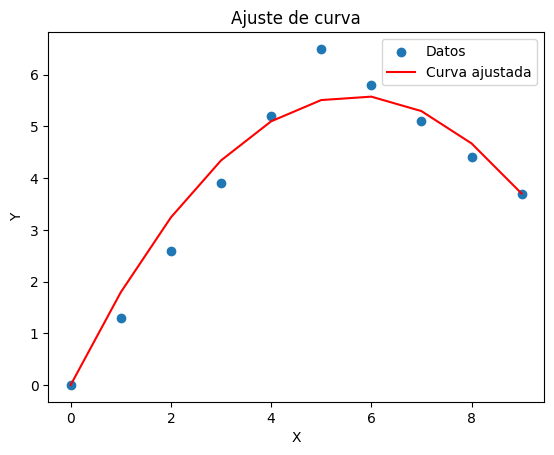

In [4]:
# Funcion de ajuste propuesta
def func(x, a, b):
    return -a*x**2+b*x

# Ajuste de curva
params, cov = curve_fit(func,curva['x'],curva['y'])

# Parametros del ajuste
a, b = params

# Valores ajustados
y_fit = func(curva['x'], a, b)

# calcular el error
error = np.sqrt(np.diag(cov))

# imprimir los parametros del ajuste y el error
print("Parámetros del ajuste:")
print("a =", a)
print("b =", b)
print("Error:")
print("Error en a =", error[0])
print("Error en b =", error[1])

# grafico de los datos y la curva ajustada
plt.scatter(curva['x'], curva['y'], label='Datos')
plt.plot(curva['x'], y_fit, 'r-', label='Curva ajustada')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Ajuste de curva')
plt.legend()
plt.show()


Mejores parametros:
Norma: 6.1948649739116535
Media: 5.746549673897495
Desviación estándar: 2.782812936830439
x^2: 1.0656934166963767


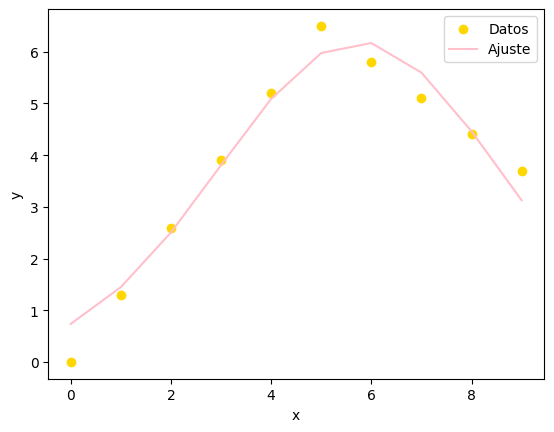

In [5]:
#definir la funcion de ajuste propuesta
def gauss(x, norm, mean, sigma):
    return norm * np.exp(-(x - mean)**2 / (2 * sigma**2))

#ajuste de curva con la funcion gauss
popt, pcov = curve_fit(gauss, curva['x'], curva['y'])

#calcular el error asociado (x^2)
y_pred = gauss(curva['x'], *popt)
residuals = curva['y'] - y_pred
chi2 = np.sum((residuals / y_pred)**2)

#imprimir los mejores parametros para el ajuste
print("Mejores parametros:")
print("Norma:", popt[0])
print("Media:", popt[1])
print("Desviación estándar:", popt[2])

#imprimir el x^2
print("x^2:", chi2)

# graficar los datos y la curva ajustada
plt.scatter(curva['x'], curva['y'],color='gold', label='Datos')
plt.plot(curva['x'], y_pred, color='pink', label='Ajuste')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/scipy/optimize/_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Parámetros del ajuste:
x_offset = 1.0
b = -10428.431334954674
norm = 10429.741132410973
mean = 3.052016030571409
sigma = 165.90999690093398
x² = 1.6668520134675273


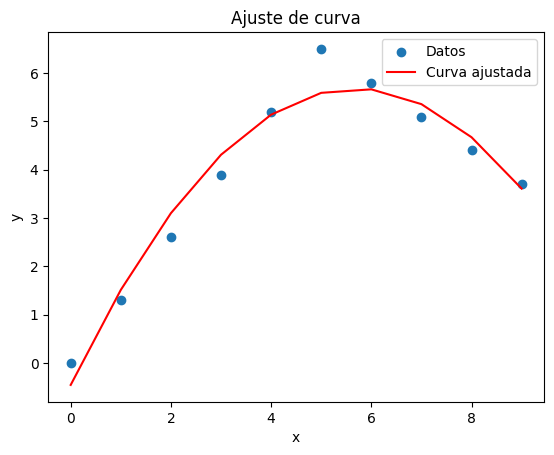

In [6]:
#definir la función de ajuste
def f(x, x_offset, b, norm, mean, sigma):
    return x + b + gauss(x, norm, mean, sigma)

# definir la funcion gaussiana
def gauss(x, norm, mean, sigma):
    return norm * np.exp(-(x - mean)**2 / (2 * sigma**2))

# ajuste de curva
params, cov = curve_fit(f, curva['x'], curva['y'])

# parametros del ajuste
x_offset, b, norm, mean, sigma = params

# valores ajustados
y_fit = f(curva['x'], x_offset, b, norm, mean, sigma)

# calcular el x² para el ajuste
residuals = curva['y'] - y_fit
chi2 = np.sum(residuals**2)

# imprimir los parámetros del ajuste y el x²
print("Parámetros del ajuste:")
print("x_offset =", x_offset)
print("b =", b)
print("norm =", norm)
print("mean =", mean)
print("sigma =", sigma)
print("x² =", chi2)

#grafico de los datos y la curva ajustada
plt.scatter(curva['x'], curva['y'], label='Datos')
plt.plot(curva['x'], y_fit, 'r-', label='Curva ajustada')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Ajuste de curva')
plt.legend()
plt.show()


##Ajuste de curvas
Este ejercicio plantea la habilidad de extraer información de la base de datos.
Leer el archivo ’auto.csv’ de la carpeta ’data’ del repositorio
https://gitlab.com/udea3/cursofci-2023-1.git
y realizar el siguiente ejercicios:

* Realizar tres plot que permitan extraer información de valor de la base de datos. En cada plot sacar
una conclusión (puedes escoger cualquier variable para graficar).
* Supongamos que un gerente de venta de autos te pide un informe. Te plantea escoger 2 relaciones entre diferentes variables de la base de datos y que argumentes la importancia de ellas. Ej: precio-caballos
de potencia, marca-precio y marca-combustible. Diseña un informe sencillo.

In [7]:
#leyendo el archivo
# BUEN TRABAJO
#5.0
auto=pd.read_csv("/content/drive/MyDrive/FC1/clases/auto.csv")
auto

Unnamed: 0  symboling  normalized-losses         make aspiration  \
0             0          3                122  alfa-romero        std   
1             1          3                122  alfa-romero        std   
2             2          1                122  alfa-romero        std   
3             3          2                164         audi        std   
4             4          2                164         audi        std   
..          ...        ...                ...          ...        ...   
196         196         -1                 95        volvo        std   
197         197         -1                 95        volvo      turbo   
198         198         -1                 95        volvo        std   
199         199         -1                 95        volvo      turbo   
200         200         -1                 95        volvo      turbo   

    num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0            two  convertible          rwd           front        88.6  ...   
1            two  convertible          rwd           front        88.6  ...   
2            two    hatchback          rwd           front        94.5  ...   
3           four        sedan          fwd           front        99.8  ...   
4           four        sedan          4wd           front        99.4  ...   
..           ...          ...          ...             ...         ...  ...   
196         four        sedan          rwd           front       109.1  ...   
197         four        sedan          rwd           front       109.1  ...   
198         four        sedan          rwd           front       109.1  ...   
199         four        sedan          rwd           front       109.1  ...   
200         four        sedan          rwd           front       109.1  ...   

     compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price  \
0                  9.0       111.0    5000.0        21          27  13495.0   
1                  9.0       111.0    5000.0        21          27  16500.0   
2                  9.0       154.0    5000.0        19          26  16500.0   
3                 10.0       102.0    5500.0        24          30  13950.0   
4                  8.0       115.0    5500.0        18          22  17450.0   
..                 ...         ...       ...       ...         ...      ...   
196                9.5       114.0    5400.0        23          28  16845.0   
197                8.7       160.0    5300.0        19          25  19045.0   
198                8.8       134.0    5500.0        18          23  21485.0   
199               23.0       106.0    4800.0        26          27  22470.0   
200                9.5       114.0    5400.0        19          25  22625.0   

     city-L/100km horsepower-binned  diesel  gas  
0       11.190476            Medium       0    1  
1       11.190476            Medium       0    1  
2       12.368421            Medium       0    1  
3        9.791667            Medium       0    1  
4       13.055556            Medium       0    1  
..            ...               ...     ...  ...  
196     10.217391            Medium       0    1  
197     12.368421              High       0    1  
198     13.055556            Medium       0    1  
199      9.038462            Medium       1    0  
200     12.368421            Medium       0    1  

[201 rows x 30 columns]

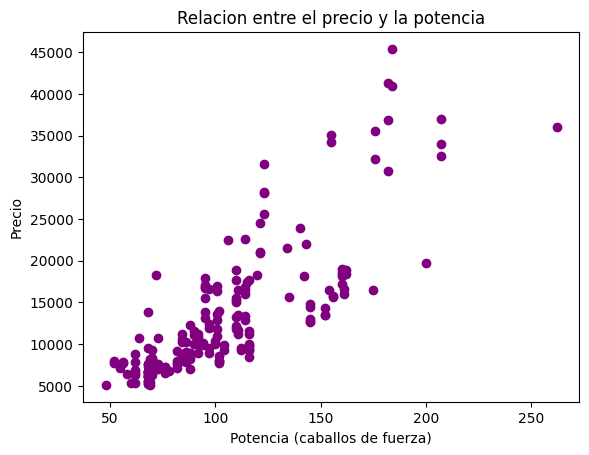

In [8]:
#relacion entre el precio y la potencia
plt.scatter(auto['horsepower'], auto['price'],color="purple")
plt.xlabel('Potencia (caballos de fuerza)')
plt.ylabel('Precio')
plt.title('Relacion entre el precio y la potencia')
plt.show()






In [9]:
#Hallar los datos asociados a la potencia maxima
pmax=auto.horsepower.max()
fpmax= auto.loc[auto['horsepower'] == pmax]
fpmax

Unnamed: 0  symboling  normalized-losses    make aspiration num-of-doors  \
46          46          0                122  jaguar        std          two   

   body-style drive-wheels engine-location  wheel-base  ...  \
46      sedan          rwd           front       102.0  ...   

    compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price  \
46               11.5       262.0    5000.0        13          17  36000.0   

    city-L/100km horsepower-binned  diesel  gas  
46     18.076923               NaN       0    1  

[1 rows x 30 columns]

In [10]:
#hallar el recio maximo
auto.price.max()

45400.0

En la grafica anterior, existe una relación positiva entre la potencia y el precio de los autos. A medida que la potencia aumenta, el precio tiende a ser más alto.
Sin embargo el auto que tiene mayor potencia no es el que tiene mayor precio, sino el que tiene un valor de: 36000 y es un jaguar sedan dos puertas.


In [11]:
#relacion entre la marca y el precio
plt.bar(auto['make'], auto['price'],color="orange")
plt.xlabel('Marca')
plt.ylabel('Precio')
plt.title('Relacion entre la marca y el precio')
plt.xticks(rotation=90)
plt.show()


In [12]:
#datos asocados al mayor precio
prmax=auto.price.max()
fprmax= auto.loc[auto['price'] == prmax]
fprmax

Unnamed: 0  symboling  normalized-losses           make aspiration  \
71          71          1                122  mercedes-benz        std   

   num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
71          two    hardtop          rwd           front       112.0  ...   

    compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price  \
71                8.0       184.0    4500.0        14          16  45400.0   

    city-L/100km horsepower-binned  diesel  gas  
71     16.785714              High       0    1  

[1 rows x 30 columns]

En esta grafica se pudo ver que: el precio varía significativamente según la marca de los autos. Algunas marcas tienden a tener precios más altos que otras.
El carro mas costoso vale 4500, es un mercedes benz hardtop dos puertas.

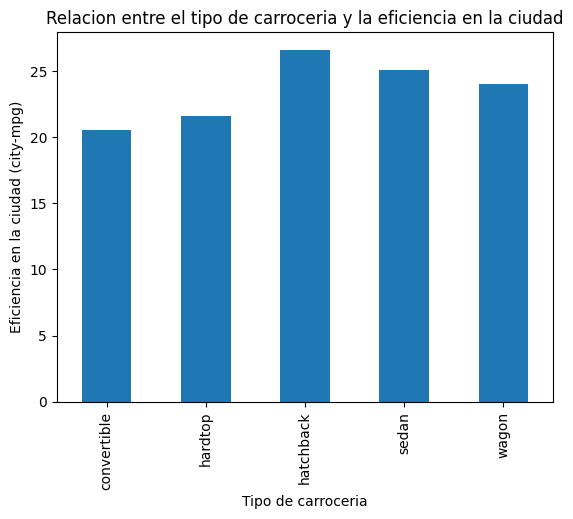

In [13]:
#relacion entre el tipo de carroceria y la eficiencia en la ciudad
h= auto.groupby('body-style')['city-mpg'].mean()
h.plot(kind='bar')
plt.xlabel('Tipo de carroceria')
plt.ylabel('Eficiencia en la ciudad (city-mpg)')
plt.title('Relacion entre el tipo de carroceria y la eficiencia en la ciudad')
plt.show()


Esta grafica muestra la eficiencia promedio en la ciudad (medida en millas por galon, city-mpg) para diferentes tipos de carrocería. Puede ser util para identificar qué tipo de carroceria tiende a ofrecer una mejor eficiencia en terminos de consumo de combustible en entornos urbanos. En este caso, el mayor eficiente es el hatchback. 

In [14]:
#media de precios por fabricante
mediap = auto.groupby('make')['price'].mean()
print(mediap)


make
alfa-romero      15498.333333
audi             17859.166667
bmw              26118.750000
chevrolet         6007.000000
dodge             7875.444444
honda             8184.692308
isuzu             8916.500000
jaguar           34600.000000
mazda            10652.882353
mercedes-benz    33647.000000
mercury          16503.000000
mitsubishi        9239.769231
nissan           10415.666667
peugot           15489.090909
plymouth          7963.428571
porsche          31400.500000
renault           9595.000000
saab             15223.333333
subaru            8541.250000
toyota            9885.812500
volkswagen       10077.500000
volvo            18063.181818
Name: price, dtype: float64


Hay una variacion significativa en los precios entre los fabricantes. Por ejemplo, Jaguar tiene el precio mas alto con un promedio de 34600, mientras que Chevrolet tiene el precio más bajo con un promedio de 6007.

Marcas como BMW, Mercedes Benz y Porsche tienden a tener precios superiores al promedio, lo que sugiere que son marcas de lujo o de alto rendimiento.

Por otro lado, marcas como Chevrolet, Dodge y Plymouth tienen precios más bajos en comparación con otras marcas, lo que indica que pueden ofrecer vehículos más asequibles.

Algunas marcas como Alfa Romeo, Audi, Honda y Toyota tienen precios promedio en el rango medio en comparación con otras marcas.

In [15]:
#correlacion entre el símbolo de calificacion y las pérdidas normalizadas
correlacion = auto['symboling'].corr(auto['normalized-losses'])
print(correlacion)


0.4662637579915129


La correlacion de 0.466 entre el símbolo de calificacion y las perdidas normalizadas sugiere que existe una relacion moderada entre estas dos variables en el conjunto de datos. Esta correlacion positiva indica que, en general, los vehiculos con una calificación de seguridad más baja tienden a tener perdidas normalizadas más altas. Sin embargo, es importante tener en cuenta que la correlación no implica causalidad directa. Hay otros factores que pueden influir en las perdidas normalizadas de los vehiculos.

In [16]:
#estadisticas descriptivas de potencia y RPM maximas
potencia = auto['horsepower'].describe()
rpm = auto['peak-rpm'].describe()
print("estadisticas de potencia:")
print(potencia)
print("estadisticas de RPM maximas:")
print(rpm)


estadisticas de potencia:
count    201.000000
mean     103.405534
std       37.365700
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      262.000000
Name: horsepower, dtype: float64
estadisticas de RPM maximas:
count     201.000000
mean     5117.665368
std       478.113805
min      4150.000000
25%      4800.000000
50%      5125.369458
75%      5500.000000
max      6600.000000
Name: peak-rpm, dtype: float64


* La potencia promedio de los vehículos es de aproximadamente 103.41 caballos de fuerza, con una desviación estándar de 37.37. Esto nos indica que hay cierta variabilidad en la potencia de los vehiculos, pero en general, se encuentran en un rango cercano al valor promedio. La potencia mínima registrada es de 48 caballos de fuerza, mientras que la potencia máxima registrada es de 262 caballos de fuerza. Estos valores extremos indican que en el conjunto de datos hay vehículos con potencias significativamente diferentes.

* La RPM maxima promedio es de aproximadamente 5117.67 revoluciones por minuto, con una desviacion estandar de 478.11. Al igual que en el caso de la potencia, encontramos cierta variabilidad en las RPM maximas de los vehiculos. La RPM maxima mínima registrada es de 4150 revoluciones por minuto, mientras que la RPM maxima registrada es de 6600 revoluciones por minuto. Esto indica que los vehículos en el conjunto de datos tienen rangos diferentes de RPM maximas.